In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
df = pd.read_csv("data/regression_part1.csv")

In [3]:
df.head()

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [4]:
df.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [5]:
n, d = df.shape

In [6]:
X = np.column_stack((np.ones(n), df.revision_time))

In [7]:
y = df.exam_score

In [8]:
model = LinearRegression(fit_intercept = False)

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [10]:
coeffs = model.coef_
coeffs

array([17.89768026,  1.44114091])

In [11]:
import matplotlib.pyplot as plt

In [12]:
xplot = np.linspace(0, 50, 200)
yplot = list(map(lambda x: coeffs[0] + coeffs[1]*x, xplot))

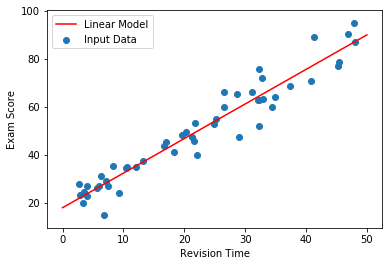

In [13]:
plt.plot(xplot, yplot, color = 'r', label="Linear Model")
plt.scatter(df.revision_time, df.exam_score, label="Input Data")

plt.xlabel("Revision Time")
plt.ylabel("Exam Score")
plt.legend()

In [14]:
X = X = np.column_stack((np.ones(n), df.revision_time))
y = df.exam_score
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

W

array([17.89768026,  1.44114091])

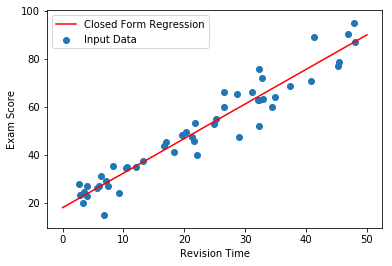

In [15]:
plt.plot(xplot, np.column_stack((np.ones(200), xplot)) @ W, label = "Closed Form Regression", color = "r")
plt.scatter(df.revision_time, df.exam_score, label = "Input Data")

plt.xlabel("Revision Time")
plt.ylabel("Exam Score")
plt.legend()

In [16]:
mean_squared_error(y, model.predict(X)), mean_squared_error(y, X @ W)

(30.9854726145413, 30.98547261454129)

In [17]:
w1s = np.linspace(-2, 2, 100)

x_pred = []
for w1 in w1s:
    x_pred.append(X @ np.array([20, w1]))
    
mse_plot = list(map(lambda x: mean_squared_error(y, x), x_pred))


Text(0,0.5,'Mean Squared Error')

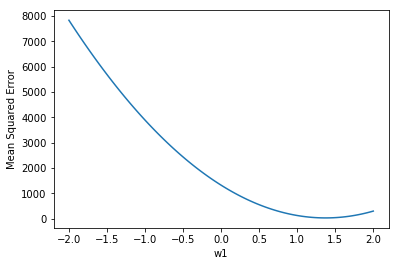

In [18]:
plt.plot(w1s, mse_plot)
plt.xlabel("w1")
plt.ylabel("Mean Squared Error")

In [19]:
np.argmin(mse_plot), w1s[np.argmin(mse_plot)]

(83, 1.3535353535353538)